In [23]:
from tensorflow import keras
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
from keras.preprocessing.image import load_img
import glob
import shutil

In [24]:
model = tf.keras.models.load_model('model_fruits_v1.h5')

In [25]:
model.input_shape

(None, 224, 224, 3)

In [28]:
#test_pic1 = 'orange_test.jpg'
test_pic1 = 'jablko_test.jpg'

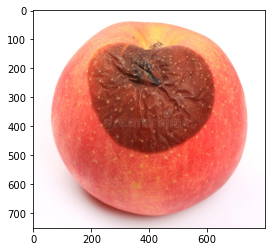

In [29]:
image = load_img(test_pic1)
plt.grid(False)
plt.imshow(image)

In [30]:
im = cv2.imread(test_pic1)
im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (224, 224)).astype(np.float32) / 255.0
im = np.expand_dims(im, axis =0)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
output_dict = {0: 'fresh_apple',
  1:'fresh_banana',
  2:'fresh_bitter_gourd',
  3:'fresh_capsicum',
  4:'fresh_orange',
  5:'fresh_tomato',
  6:'stale_apple',
  7:'stale_banana',
  8:'stale_bitter_gourd',
  9:'stale_capsicum',
  10:'stale_orange',
  11:'stale_tomato'}

In [32]:
model.predict(im)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        5.967153e-23, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00]],
      dtype=float32)

In [33]:
classes = np.argmax(model.predict(im), axis = -1)

In [34]:
classes

array([6], dtype=int64)

In [35]:
names = [output_dict[i] for i in classes]

In [36]:
names

['stale_apple']

# Co dalej? 

- Wytrenowanie innej architektury DNN, z innymi parametrami, większą liczbą generacji itp.
- Test modelu na większej próbce zdjęć
- XAI -> pokazanie super pixeli, które odpowiadają za taką, a nie inną predykcję
- Predykcja Live za pomocą kamery internetowej / smartfona


